In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/train.csv')

In [3]:
# simple analysis of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   study_id                                1975 non-null   int64 
 1   spinal_canal_stenosis_l1_l2             1974 non-null   object
 2   spinal_canal_stenosis_l2_l3             1974 non-null   object
 3   spinal_canal_stenosis_l3_l4             1974 non-null   object
 4   spinal_canal_stenosis_l4_l5             1974 non-null   object
 5   spinal_canal_stenosis_l5_s1             1974 non-null   object
 6   left_neural_foraminal_narrowing_l1_l2   1973 non-null   object
 7   left_neural_foraminal_narrowing_l2_l3   1973 non-null   object
 8   left_neural_foraminal_narrowing_l3_l4   1973 non-null   object
 9   left_neural_foraminal_narrowing_l4_l5   1973 non-null   object
 10  left_neural_foraminal_narrowing_l5_s1   1973 non-null   object
 11  righ

Solo Study_ID es numerico, el resto es un string , posiblemente categóricas

In [4]:
for column in data.columns[1:]:
    print("----------------------------------------------------")
    print(f"COLUMN {column}" )
    print(data[column].unique())
    print("----------------------------------------------------")

----------------------------------------------------
COLUMN spinal_canal_stenosis_l1_l2
['Normal/Mild' 'Moderate' 'Severe' nan]
----------------------------------------------------
----------------------------------------------------
COLUMN spinal_canal_stenosis_l2_l3
['Normal/Mild' 'Moderate' 'Severe' nan]
----------------------------------------------------
----------------------------------------------------
COLUMN spinal_canal_stenosis_l3_l4
['Normal/Mild' 'Moderate' 'Severe' nan]
----------------------------------------------------
----------------------------------------------------
COLUMN spinal_canal_stenosis_l4_l5
['Normal/Mild' 'Severe' 'Moderate' nan]
----------------------------------------------------
----------------------------------------------------
COLUMN spinal_canal_stenosis_l5_s1
['Normal/Mild' 'Moderate' 'Severe' nan]
----------------------------------------------------
----------------------------------------------------
COLUMN left_neural_foraminal_narrowing_l1_

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


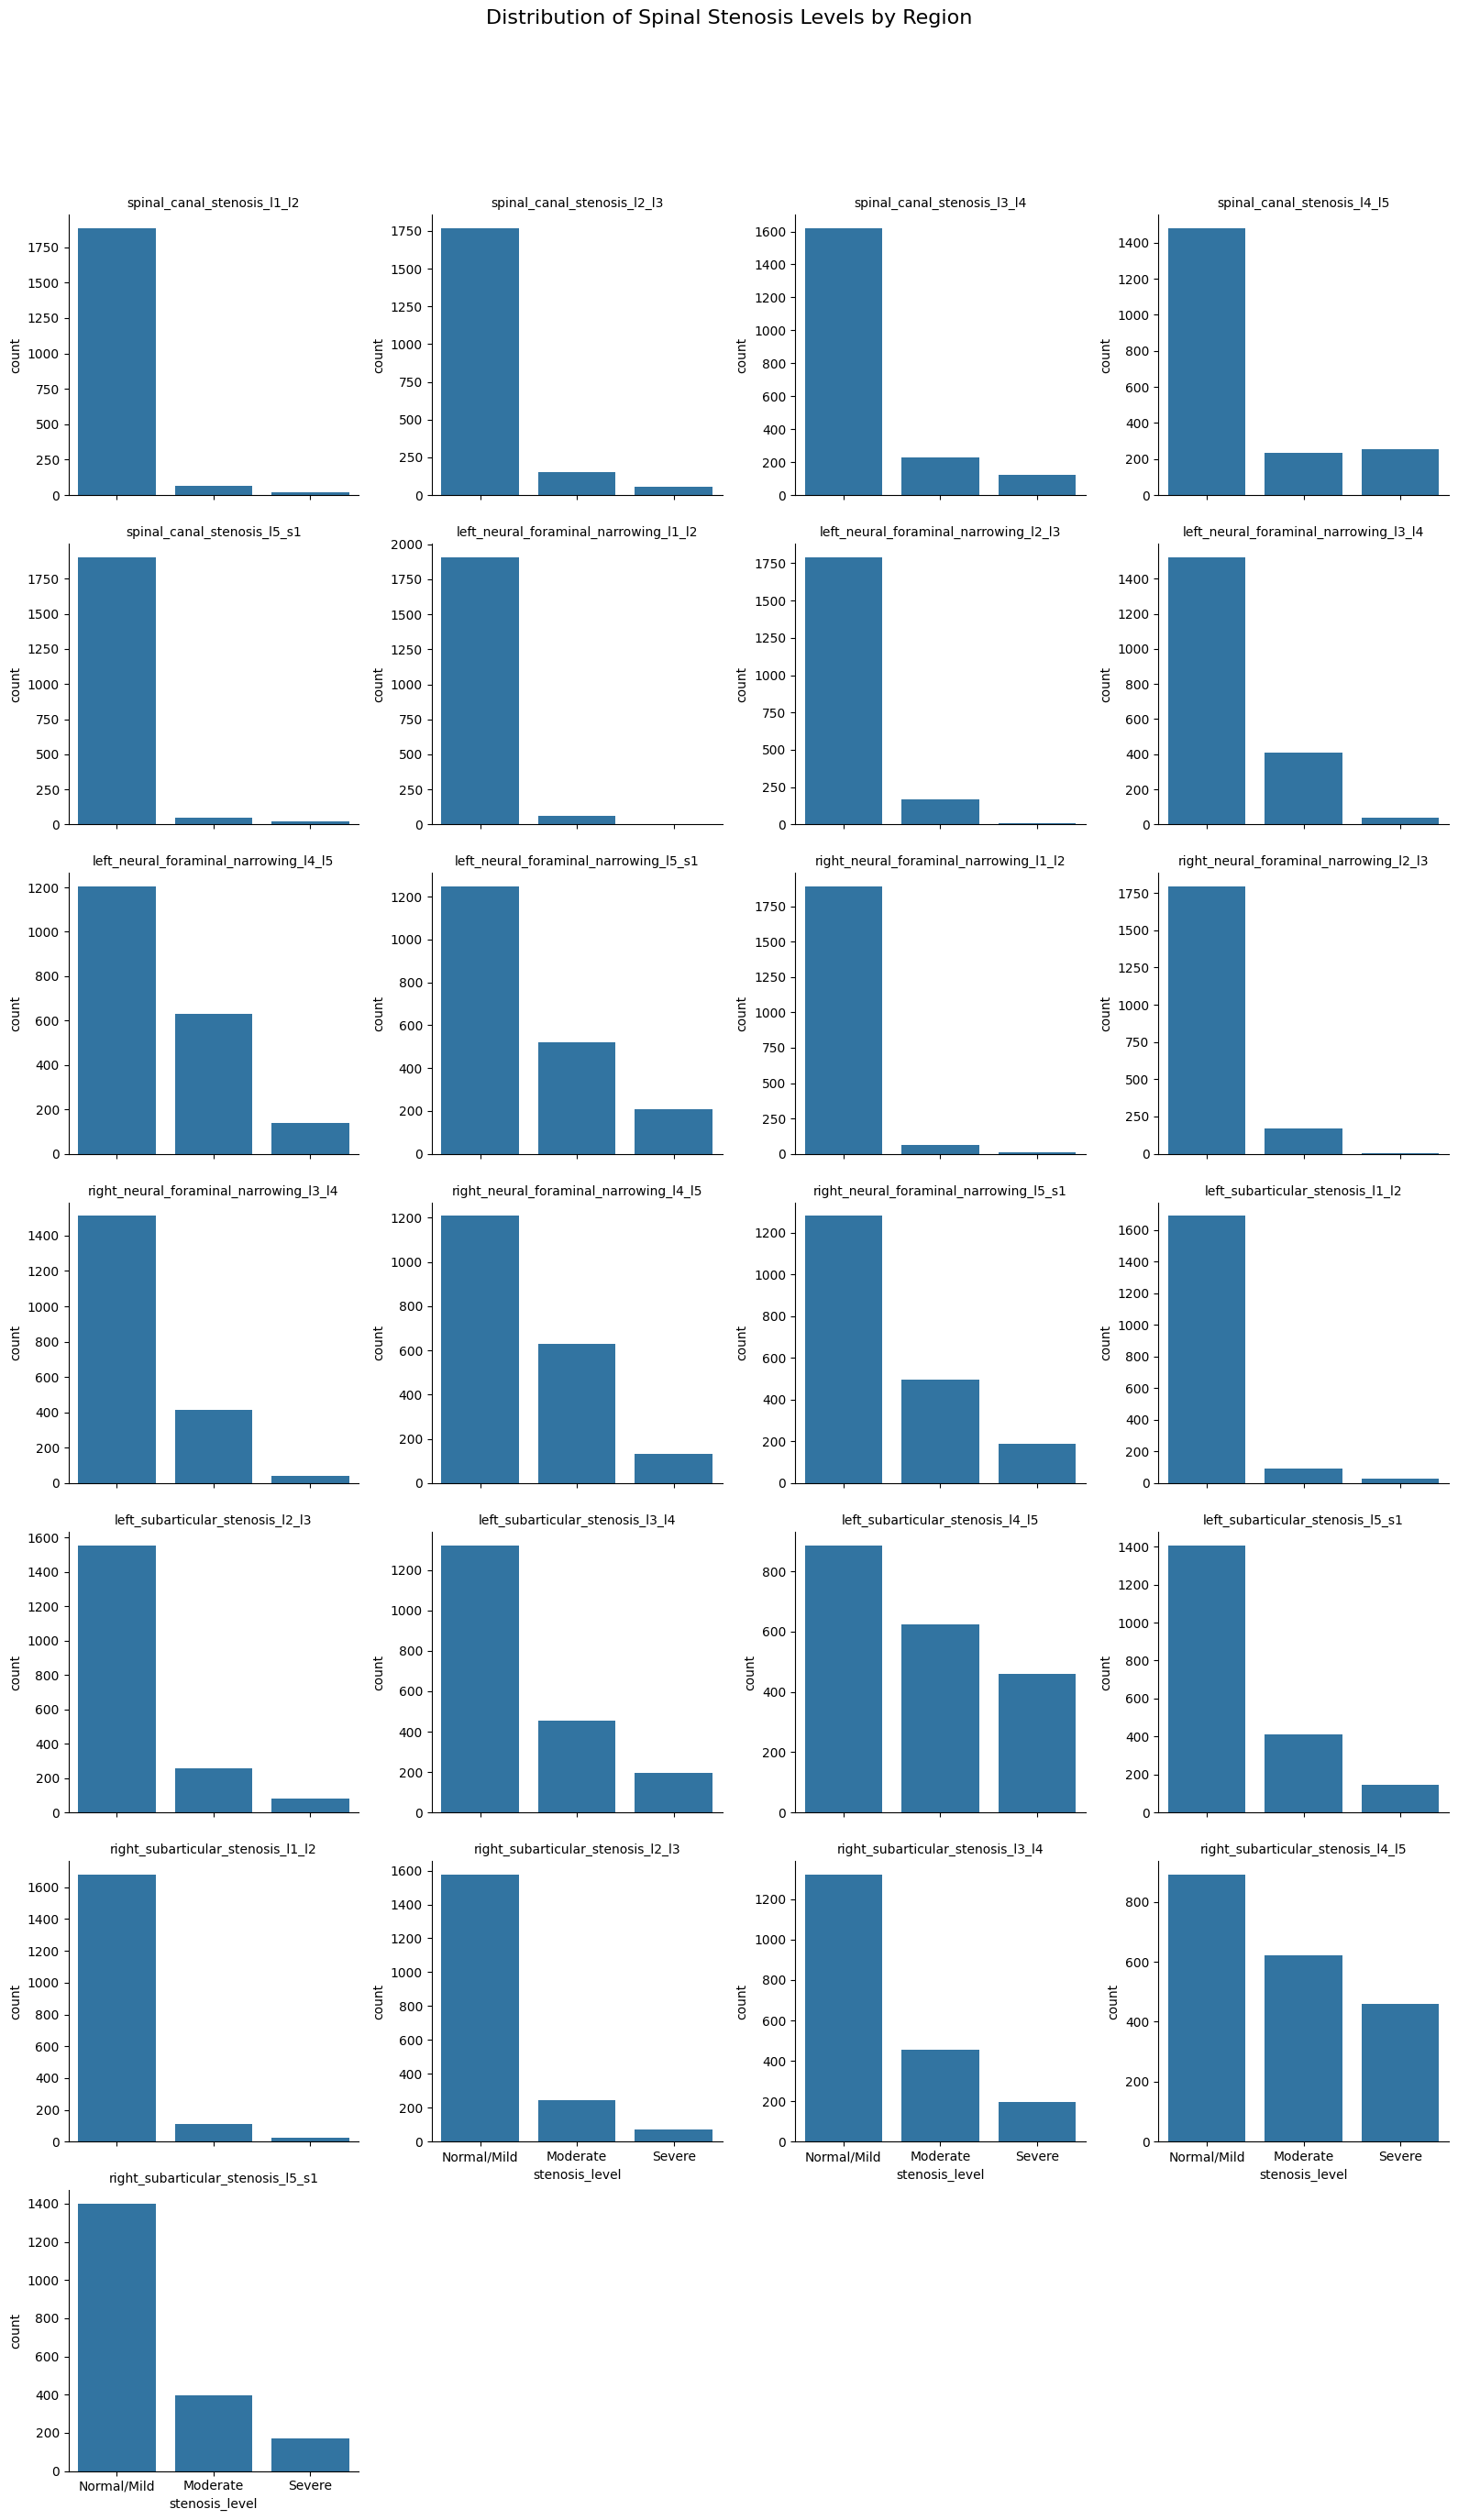

In [5]:
data_melted = data.melt(id_vars='study_id', var_name='spinal_region', value_name='stenosis_level')

# Create a FacetGrid to divide the plots into multiple smaller charts
g = sns.FacetGrid(data_melted, col="spinal_region", col_wrap=4, height=4, sharey=False)
g.map(sns.countplot, "stenosis_level")

# Adjust the titles
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Spinal Stenosis Levels by Region', fontsize=16)

plt.show()

In [7]:
# replacing the scale from string into numerical scale ( discrete )
data_cleaned = pd.DataFrame(data)
for region in data_cleaned.columns[1:]:
    data_cleaned[region] = data_cleaned[region].replace({'Normal/Mild':0, 'Severe':2, 'Moderate':1})
data.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [10]:
data_cleaned.to_csv('./data/train_cleaned.csv')
data_cleaned.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4646740,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0
2,7143189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8785691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10728036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,count,mean,std,min,25%,50%,75%,max
study_id,1975.0,2.160989e+09,1.236621e+09,4003253.0,1.094775e+09,2.197997e+09,3.221041e+09,4.290709e+09
spinal_canal_stenosis_l1_l2,1974.0,5.521783e-02,2.710768e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
spinal_canal_stenosis_l2_l3,1974.0,1.301925e-01,4.086870e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
spinal_canal_stenosis_l3_l4,1974.0,2.401216e-01,5.533762e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
spinal_canal_stenosis_l4_l5,1974.0,3.784195e-01,7.027283e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
spinal_canal_stenosis_l5_s1,1974.0,4.508612e-02,2.496702e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
left_neural_foraminal_narrowing_l1_l2,1973.0,3.395844e-02,1.866823e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
left_neural_foraminal_narrowing_l2_l3,1973.0,9.782058e-02,3.153611e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
left_neural_foraminal_narrowing_l3_l4,1973.0,2.488596e-01,4.770652e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
left_neural_foraminal_narrowing_l4_l5,1973.0,4.607197e-01,6.249567e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
